# Regression Lab

Now have all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate model loss. 

## SWBAT

* Run a complete regression analysis through code only. 

## Here are all the formulas to put everything in perspective

#### Slope
<img src="m.png" width = 300>

#### Intercept 
<img src="b.png" width = 200>

#### R-squared
<img src="r2.png" width = 400>

#### Prediction
![](pred.jpg)


Use the functions created earlier to implement these formulas to run a regression analysis using X and Y as input variables. 

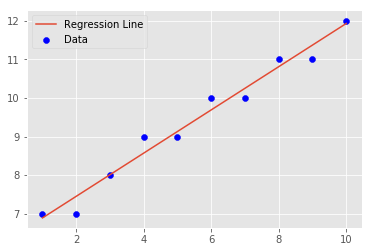

In [30]:

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)

def calc_slope(xs,ys):
    mean_x_y = np.mean(np.multiply(xs,ys))
    mean_x = np.mean(xs)
    mean_y = np.mean(ys)
    xsq = np.multiply(xs,xs)
    numerator = (mean_x * mean_y) - mean_x_y
    denom = (mean_x**2) - np.mean(xsq)
    slope = numerator/denom
    return slope

def regression_l(m,x,b):
    for i in x:
        y_hat = (m*x) + b
    return y_hat

def sq_err(ys_a, ys_b):
    y = np.subtract(ys_a, ys_b)
    ysq = np.square(y)
    sse = sum(ysq)
    
    return sse

def best_fit(xs,ys):
    y_bar = np.mean(ys)
    x_bar = np.mean(xs)
    m = calc_slope(xs,ys)
    b = y_bar - (x_bar * m)
    return b

def r_squared(ys_real, ys_predicted):
    y_mean = np.mean(ys_real)
    SSE = sq_err(ys_real, ys_predicted)
    SST = sq_err(ys_real, y_mean)
    r = SSE/SST
    rsq = 1-r
    return rsq





slope = round(calc_slope(X,Y),2)
y_intercept = round(best_fit(X,Y),2)
y_hat = regression_l(slope, X, y_intercept)
rsq = round(r_squared(Y, y_hat),2) 

slope, y_intercept, rsq

plt.style.use('ggplot')
plt.scatter(X,Y,label = 'Data', color = "blue")
plt.plot(X,y_hat, label='Regression Line')

plt.legend()
plt.show()


In [28]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of x = 4.5.

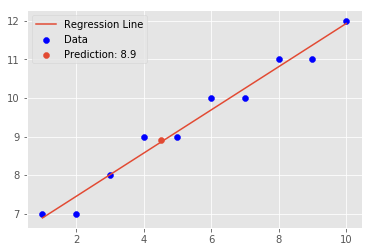

In [29]:
# Make prediction using given value and visualize on the scatter plot

regression_pt = round((slope * 4.5) + y_intercept,1)

plt.scatter(X,Y,label = 'Data', color = "blue")
plt.plot(X,y_hat, label='Regression Line')
plt.scatter(4.5,regression_pt, label = f'Prediction: {regression_pt}')

plt.legend()
plt.show()

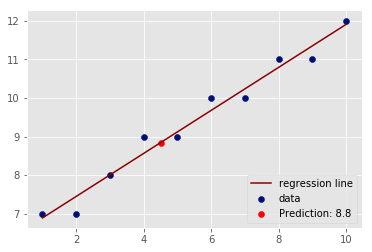

## Level up - Optional 
Load the "heightWeight.csv" dataset. Use the height as an independant and weight as a dependant variable and draw a regression line to data using your code above. Calculate your R-square for the model and try to predict new values of Y. 

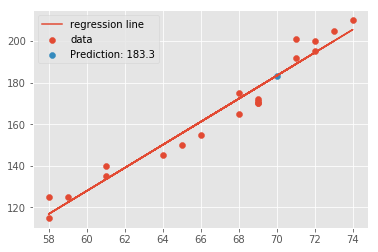

In [37]:
df = pd.read_csv('heightWeight.csv')
slope = round(calc_slope(df.height, df.Weight),2)
y_intercept = round(best_fit(df.height, df.Weight),2)
y_hat = round(regression_l(slope, df.height, y_intercept),2)
rsq = round(r_squared(df.height, y_hat),2)
regression_pt = round((slope * 70) + y_intercept,1)


plt.scatter(df.height, df.Weight, label = 'data')
plt.plot(df.height, y_hat, label = 'regression line')
plt.scatter(70, regression_pt, label = f"Prediction: {regression_pt}")
plt.legend()
plt.show()

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next We shall see how we can use python's built in modules to perform such analyses with a much higher level of sophistication. 